In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [2]:
#Chargement des donnees

iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
target = iris.target_names
target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# data frame
df =pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
x, y = iris.data[:, :2], iris.target

#on conserve 50% du jeu de donnees pour l'evaluation
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5)


In [6]:
C= 0.9  #parametre de regularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=0.9)

In [7]:
lin_svc.score(x_test,y_test)

0.7466666666666667

Text(0.5, 1.0, 'Linear SCV')

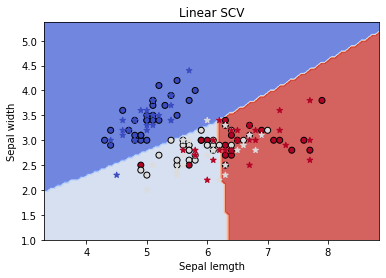

In [8]:
#creer la surface de decision discretisee
x_min, x_max = x[:, 0].min()-1, x[:,0].max()+1
y_min, y_max = x[:, 1].min()-1, x[:,1].max()+1
#pour afficher la surface de decision on va discretiser l'espace avec un pas h
h = max((x_max-x_min) / 100,(y_max-y_min) / 100)
xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#surface decision 
z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha= 0.8)
#affichie aussi les points d'apprentissage
plt.scatter(x_train[:,0],x_train[:,1],label="train",edgecolors="k",c=y_train,cmap=plt.cm.coolwarm)
plt.scatter(x_test[:,0],x_test[:,1],label="test",marker="*",c=y_test,cmap=plt.cm.coolwarm)
plt.xlabel('Sepal lemgth')
plt.ylabel('Sepal width')
plt.title('Linear SCV')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


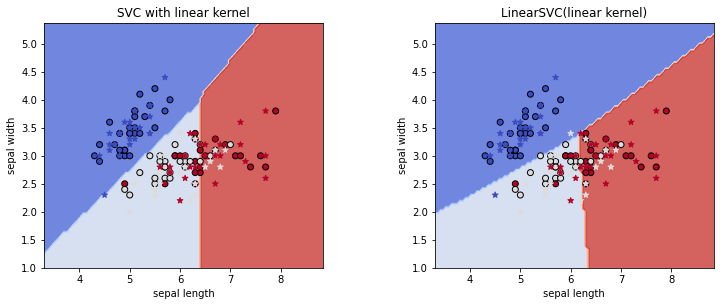

In [13]:
lin_svc = svm.LinearSVC(C=C).fit(x_train,y_train)
svc = svm.SVC(kernel='linear',C=C).fit(x_train,y_train)

titles =['SVC with linear kernel','LinearSVC(linear kernel)']
fig = plt.figure(figsize=(12,4.5))

for i,clf in enumerate ((svc,lin_svc)):
    plt.subplot(1,2,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    #utiliser une palette de couleurs
    z = z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap = plt.cm.coolwarm,alpha = 0.8)
    #afficher aussi les points d'apprentissage
    plt.scatter(x_train[:,0],x_train[:,1],label = "train", edgecolors= "k",c = y_train, cmap = plt.cm.coolwarm)
    plt.scatter(x_test[:,0],x_test[:,1],label="test",marker="*",c=y_test, cmap = plt.cm.coolwarm)
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.title(titles[i])
plt.show()    

In [14]:
x,y = iris.data, iris.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5)
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(x_train,y_train)
lin_svc.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9466666666666667